In [52]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Input data
data = {"full":"transcripts_full_wp1.gtf", "multi":"transcripts_multi_wp1.gtf"}
df_dict = {}
for id, file in data.items():
    df = pd.DataFrame()
    df = pd.read_csv(file, sep="\t", names=["seqname","source","feature","start","end","score","strand","frame","attribute"])
    df_dict[id] = df
    print(df.head(10))

      seqname         source     feature   start     end  score strand frame  \
0  GL000008.2  FortgMethoden  transcript  179629  181352      0      -     .   
1  GL000008.2  FortgMethoden        exon  179629  179806      0      -     .   
2  GL000008.2  FortgMethoden        exon  181193  181352      0      -     .   
3  GL000194.1  FortgMethoden  transcript   53590   55310      0      -     .   
4  GL000194.1  FortgMethoden        exon   53590   55310      0      -     .   
5  GL000194.1  FortgMethoden  transcript   53590  115051      0      -     .   
6  GL000194.1  FortgMethoden        exon   53590   54832      0      -     .   
7  GL000194.1  FortgMethoden        exon   55446   55676      0      -     .   
8  GL000194.1  FortgMethoden        exon  112792  112850      0      -     .   
9  GL000194.1  FortgMethoden        exon  114986  115051      0      -     .   

                                       attribute  
0  gene_id "Gene0"; transcript_id "Transcript0";  
1  gene_id "Gene0

97597
82831


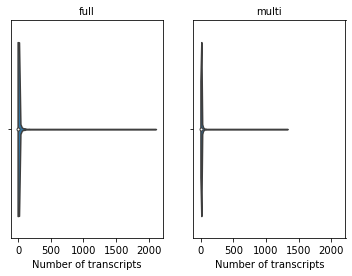

In [85]:
# Transcripts per gene
fig, axs = plt.subplots(1, len(df_dict), sharex=True)
count = 0
for id, frame in df_dict.items():
    df_transcripts = pd.DataFrame()
    df_transcripts = frame[frame["feature"] == "transcript"]
    print(df_transcripts.shape[0])
    no_trans_per_gene = []
    gene = 0
    transcripts = 0
    for index, line in df_transcripts.iterrows():
        current_gene = line["attribute"].split(";")[0][13:-1]
        if current_gene == str(gene):
            transcripts += 1
        else:
            gene = current_gene
            no_trans_per_gene.append(transcripts)
            transcripts = 1
    no_trans_per_gene.append(transcripts)
    no_genes = len(no_trans_per_gene)
    df_vis = pd.DataFrame.from_dict({"Gene": list(range(no_genes)), "Number of transcripts": no_trans_per_gene})
    sns.violinplot(ax=axs[count], x=df_vis["Number of transcripts"])
    #sns.violinplot(ax=axs[count], x=df_vis[df_vis["Number of transcripts"] > 100]["Number of transcripts"])
    axs[count].set_title(id, fontsize=10)
    #sns.boxplot(ax=axs[count], x=df_vis["Number of transcripts"])
    #axs[count].boxplot(x=df_vis["Number of transcripts"], labels=[id])
    count += 1
